In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [25]:
def mc_integration(x_init, x_final, func, n=100000):
  """ Function to do monte carlo integration for 
      n samples.

  Parameters
  -----------------------------------------------
  x_init(float): Starting point of integration.
  x_final(float): Ending point of integration.
  func(function): Python function that you want to integrate.
  n(int): Number of samples.

  """

  X = np.linspace(x_init, x_final, 1000)
  y1 = 0
  # Overshoot by 1 for convergence
  y2 = max((func(X))) + 1
      
  area = (x_final-x_init)*(y2-y1)
  check = []
  xs = []
  ys = []

  for _ in range(n):
      
      # Generate Samples
      x = np.random.uniform(x_init,x_final,1)
      xs.append(float(x))
      
      y = np.random.uniform(y1,y2,1)
      ys.append(float(y))
      
      # Reject
      if abs(y) > abs(func(x)) or y<0:
          check.append(0)
      
      # Accept
      else:
          check.append(1)

  return np.mean(check)*area, xs, ys, check

In [3]:
def f(x):
  return np.sin(x)

In [4]:
from scipy.integrate import quad

a = 0.3
b = 2.5

sol, xs, ys, check = mc_integration(a, b, f, n=1000000)
id_sol, _ = quad(f, a, b)

print(f'Monte Carlo Solution: {sol}')
print(f'Quad Solution: {id_sol}')
print(f'Error: {np.square(sol - id_sol)}')

C:\Users\Golam Mostafa Rabby\AppData\Local\Temp\ipykernel_7468\2031238921.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xs.append(float(x))
C:\Users\Golam Mostafa Rabby\AppData\Local\Temp\ipykernel_7468\2031238921.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ys.append(float(y))


Monte Carlo Solution: 1.7538135930770573
Quad Solution: 1.7564801046725398
Error: 7.110284088842517e-06


C:\Users\Golam Mostafa Rabby\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


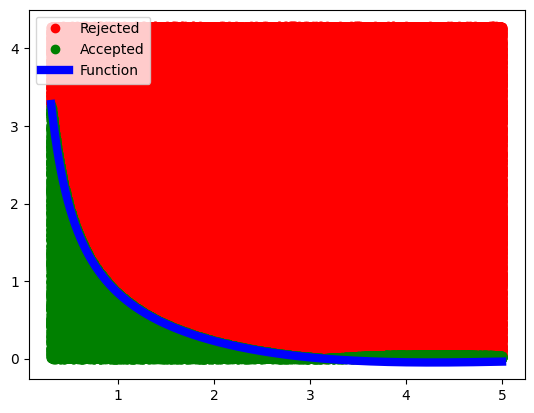

In [88]:
check = np.array(check)
xs = np.array(xs)
ys = np.array(ys)
plt.plot(xs[check == 0], ys[check == 0], 'ro', label='Rejected')
plt.plot(xs[check == 1], ys[check == 1], 'go', label='Accepted')
x = np.linspace(a,b, 100000)

plt.plot(x, f(x),color='blue', label='Function', linewidth=6)
plt.legend()
plt.show()

In [6]:
err = []

n = np.linspace(10, 10000, 100)

for i in tqdm(n):  
  sol, *_ = mc_integration(a, b, f, n=int(i))
  err.append(np.square(sol - id_sol))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\Golam Mostafa Rabby\AppData\Local\Temp\ipykernel_7468\2031238921.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xs.append(float(x))
C:\Users\Golam Mostafa Rabby\AppData\Local\Temp\ipykernel_7468\2031238921.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ys.append(float(y))
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.28it/s]


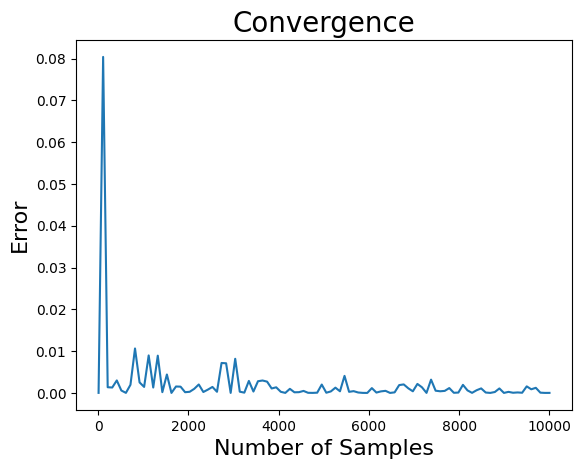

In [7]:
plt.plot(n, err)
plt.title("Convergence", size=20)
plt.xlabel("Number of Samples", size=16)
plt.ylabel("Error", size=16)
plt.show()

In [8]:
def f(x):
  return np.sin(x)/(x**2)

In [9]:
from scipy.integrate import quad

a = 0.3
b = 5

sol, xs, ys, check = mc_integration(a, b, f, n=1000000)
id_sol, _ = quad(f, a, b)

print(f'Monte Carlo Solution: {sol}')
print(f'Quad Solution: {id_sol}')
print(f'Error: {np.square(sol - id_sol)}')

C:\Users\Golam Mostafa Rabby\AppData\Local\Temp\ipykernel_7468\2031238921.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xs.append(float(x))
C:\Users\Golam Mostafa Rabby\AppData\Local\Temp\ipykernel_7468\2031238921.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ys.append(float(y))


Monte Carlo Solution: 1.7838799569749206
Quad Solution: 1.635995393784945
Error: 0.021869844029889906


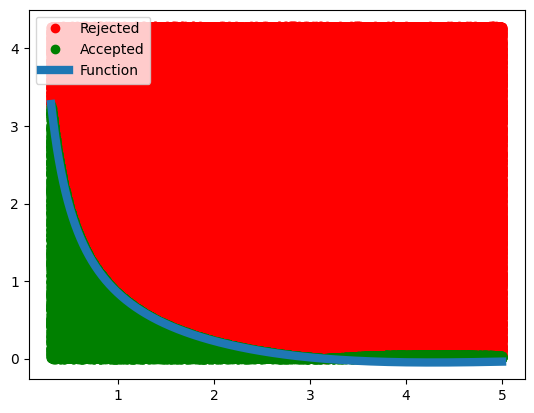

In [10]:
check = np.array(check)
xs = np.array(xs)
ys = np.array(ys)
plt.plot(xs[check == 0], ys[check == 0], 'ro', label='Rejected')
plt.plot(xs[check == 1], ys[check == 1], 'go', label='Accepted')
x = np.linspace(a, b, 100000)

plt.plot(x, f(x), label='Function', linewidth=6)
plt.legend()
plt.show()

In [11]:
err = []

n = np.linspace(10, 10000, 100)

for i in tqdm(n):  
  sol, *_ = mc_integration(a, b, f, n=int(i))
  err.append(np.square(sol - id_sol))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\Golam Mostafa Rabby\AppData\Local\Temp\ipykernel_7468\2031238921.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xs.append(float(x))
C:\Users\Golam Mostafa Rabby\AppData\Local\Temp\ipykernel_7468\2031238921.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ys.append(float(y))
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.40it/s]


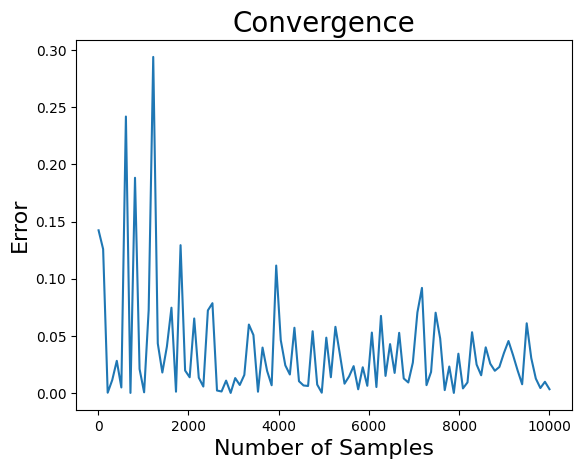

In [12]:
plt.plot(n, err)
plt.title("Convergence", size=20)
plt.xlabel("Number of Samples", size=16)
plt.ylabel("Error", size=16)
plt.show()

In [13]:
import numpy as np

def count_fault_points(point1, point2, fault_probability):
    """
    Count how many fault points occur in a given interval.

    Parameters
    -----------------------------
    point1 (int): start point on x-axis
    point2 (int): end point on x-axis
    fault_probability (float): probability of fault at a point

    Returns
    -----------------------------
    fault_count (int): number of fault points in the interval
    points (list): all generated points (0 or 1)
    """
    
    points = []
    fault_count = 0

    for x in range(point1, point2 + 1):
        # Generate random number for fault decision
        if np.random.rand() < fault_probability:
            points.append(1)   # fault
            fault_count += 1
        else:
            points.append(0)   # no fault

    return fault_count, points


In [14]:

fault_probability = 0.3   # 30% chance of fault per point
# point1 = 6000
# point2 = 8000
f_sum = 0

for i in range(0, 10000-100, 1000):
    
    faults, generated_points = count_fault_points(i, i+100, fault_probability)
    
    print("Fault points:", generated_points)
    print("Number of faults between point1 and point2:", faults)
    f_sum += faults
    print("\n\n")

print("Total Faults:", f_sum)

Fault points: [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Number of faults between point1 and point2: 30



Fault points: [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
Number of faults between point1 and point2: 35



Fault points: [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 